<a href="https://colab.research.google.com/github/Priyankaw120/Blockchain_Explorer/blob/main/BlockChain_EXP1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install requests

In [3]:
import requests
import json

url = "https://api.etherscan.io/api"

api_key = "HU49E3YV9DHKD7ATQBQC69MT69BHT725F8"

address = "0x0AFfB0a96FBefAa97dCe488DfD97512346cf3Ab8"

payload = {
    "module": "account",
    "action": "txlist",
    "address": address,
    "startblock": 0,
    "endblock": 99999999,
    "sort": "asc",
    "apikey": api_key
}

response = requests.get(url, params=payload)

data = json.loads(response.content)

for transaction in data['result']:
    print(transaction)


{'blockNumber': '18719683', 'timeStamp': '1701773711', 'hash': '0x5ff96670eaddd966553f1fb5789f040b8d59ca097cd00647c1af13cfcc9720ea', 'nonce': '405328', 'blockHash': '0x41d72987b685c2caa9c4825e3613b6a1d9eaa442157c2c72305a51ba815a03df', 'transactionIndex': '103', 'from': '0x1f9090aae28b8a3dceadf281b0f12828e676c326', 'to': '0x0affb0a96fbefaa97dce488dfd97512346cf3ab8', 'value': '100000000000000000', 'gas': '21000', 'gasPrice': '49377048280', 'isError': '0', 'txreceipt_status': '1', 'input': '0x', 'contractAddress': '', 'cumulativeGasUsed': '6891956', 'gasUsed': '21000', 'confirmations': '412560', 'methodId': '0x', 'functionName': ''}
{'blockNumber': '18719819', 'timeStamp': '1701775379', 'hash': '0xb40bd6b6fd18690ef2eaccf38a081ccd1737335d177c984b101be0dfe5566b85', 'nonce': '0', 'blockHash': '0x1db55c80f558bbbccc91ed92db47286d45fc33cd11e6d50d997f38f8164a6cf2', 'transactionIndex': '147', 'from': '0x0affb0a96fbefaa97dce488dfd97512346cf3ab8', 'to': '0x388c818ca8b9251b393131c08a736a67ccb19297',

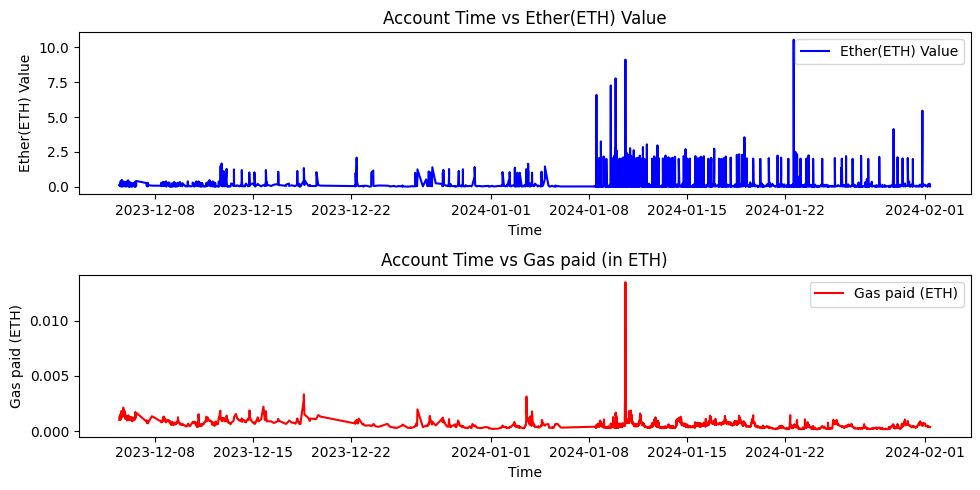

In [4]:
import matplotlib.pyplot as plt
from datetime import datetime

timestamps = [datetime.fromtimestamp(int(tx['timeStamp'])) for tx in data['result']]
eth_values = [float(tx['value']) / 1e18 for tx in data['result']]
gas_paid = [float(tx['gasPrice']) * float(tx['gasUsed']) / 1e18 for tx in data['result']]

# Plotting Account Time vs Ether(ETH) Value
plt.figure(figsize=(10, 5))
plt.subplot(2, 1, 1)
plt.plot(timestamps, eth_values, label='Ether(ETH) Value', color='blue')
plt.title('Account Time vs Ether(ETH) Value')
plt.xlabel('Time')
plt.ylabel('Ether(ETH) Value')
plt.legend()

# Plotting Account Time vs Gas paid (in ETH)
plt.subplot(2, 1, 2)
plt.plot(timestamps, gas_paid, label='Gas paid (ETH)', color='red')
plt.title('Account Time vs Gas paid (in ETH)')
plt.xlabel('Time')
plt.ylabel('Gas paid (ETH)')
plt.legend()

# Show the plots
plt.tight_layout()
plt.show()
